# COMP0189: Applied Artificial Intelligence
## Week 3 (Model Selection and Assessment)

### After this week you will be able to ...
- encode categorical values with one-hot encoding
- know which encoding, scaling, and imputing method you should select in accordacne with the dataset characteristics
- impute missing data with KNN
- know how to streamline the preprocessing steps in advanced way (Pipeline and ColmnTransformer)
- perform model selection using different cross-validation methods
- perform model selection and model assessment using different partitions of the data

### Acknowledgements
- https://scikit-learn.org/stable/
- https://archive.ics.uci.edu/ml/datasets/adult

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Encoding and Imputations

### Task 1: Load and Split the Dataset into train and test

In [2]:
# TASK 1: Load Dataset
# We are going to use the same adult dataset as previous week.
# We have cleaned the dataset, but did not touch the missing values.
from sklearn.model_selection import train_test_split
df = pd.read_csv("clean_adult.csv")
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
sorted(list(df["Education-num"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [4]:
len(df["Education"].unique())

16

In [5]:
df = df.drop(columns=["Education"], axis=1) 
# remove Education column since its label encoded version is already present.

In [6]:
df

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
def train_test_split_df(df, test_size = 0.1, target_cols = ["Y"]):
    """
    This function splits the dataframe into train and test sets.
    It also separates the target column from the feature columns.
    """
    df_data = df.drop(columns=target_cols, axis=1)
    df_target = df[target_cols]

    split_index = int((1 - test_size) * len(df_data))

    train_X_df = df_data[:split_index]
    train_Y_df = df_target[:split_index]
    test_X_df = df_data[split_index:]
    test_Y_df = df_target[split_index:]

    train_Y_df = np.where(train_Y_df == "<=50K", 0, 1)
    test_Y_df = np.where(test_Y_df == "<=50K", 0, 1)

    return train_X_df, train_Y_df, test_X_df, test_Y_df

In [8]:
train_X_df, train_Y_df, test_X_df, test_Y_df = train_test_split_df(df) # splits the data into train and test sets.

In [9]:
for col in train_X_df:

    if col in [
        "Age",
        "Fnlwgt",
        "Capital-gain",
        "Capital-loss",
        "Hours-per-week"
    ]:
        continue
    train_uniq_vals = train_X_df[col].unique()
    test_uniq_vals = test_X_df[col].unique()

    if not set(test_uniq_vals).issubset(set(train_uniq_vals)): 
        # False: test has unexpected elements not present in the training set.
        print(col, "has values that are not in train set")

### Task 2: Encode categorical variables (label/ordinal encoding & one-hot encoding)

### Important: We need special care when we are encoding categorical variables

**1. Take care of the missing values**
- Beware not to encode missing values unless you are intending to do so.
- Sometimes you want to encode missing values to a separate cateogory. For example, when you want to predict if passengers of titanic had survived or not, missing data of certain features can actually have meaning, i.e., Cabin information can be missing because the body was not found.

**2. Know which encoding and scaling method you should select**
- If your categories are ordinal, then it makes sense to use a LabelEncoder with a MinMaxScaler. For example, you can encode [low, medium, high], as [1,2,3], i.e., distance between low to high is larger than that of medium and high.

- However, if you have non-ordinal categorical values, like [White, Hispanic, Black, Asian], then it would be better to use a OneHotEncoder instead of forcing ordinality with a LabelEncoder. Otherwise the algorithms you use (especially distance based algorithms like KNN) will make the assumption that the distance between White and Asian is larger than White and Hispanic, which is nonsensical.

**3. Split before you encode to avoid data leakage**
- Split the dataset before you encode your data. It is natural for algorithms to see unknown values in the validation/test set that was not appearing in the train set. `sklearn.preprocessing.OneHotEncoder` is good at handling these unknown categories (`handle_unknown` parameter).

- Discussion: What if you are certain about all the possible categories that can appear for each feature? Can you encode all the values before splitting the dataset into train and test set?


This notebook shows the three points in the following sections with examples.

### Task 2-1: Label Encoding (with missing values)

In [10]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

label_encoder = LabelEncoder()

In [11]:
# display the columns
ordinal_columns = ['Marital-status', 'Relationship', 'Race', 'Sex']

In [12]:
label_encoded_df = df.copy()
masked_df = label_encoded_df.isnull()
label_encoded_df.isnull()
label_encoded_df[ordinal_columns] = df[ordinal_columns].apply(label_encoder.fit_transform)
label_encoded_df = label_encoded_df.mask(masked_df, np.nan)

In [13]:
label_encoded_df[ordinal_columns]

,Marital-status,Relationship,Race,Sex
0,4,1,4,1
1,2,0,4,1
2,0,1,4,1
3,2,0,2,1
4,2,5,2,0
...,...,...,...,...
32556,2,5,4,0
32557,2,0,4,1
32558,6,4,4,0
32559,4,3,4,1


In [14]:
label_encoded_df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education-num        0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Y                    0
dtype: int64

### Task 2-2: One Hot Encoding (with missing values imputation)

Tip 1: Impute the missing values (choose the right strategy) before doing OHE  
Tip 2: Try creating a separate dataframe with one-hot encoded columns and combine the dataframe with the original dataframe for the final one.

In [15]:
# Let's first impute the missing values.
# Since it's a categorical value, we don't use KNN or mean imputation.
# We will replace with the most frequent value.
from sklearn.impute import SimpleImputer

# most frequent imputation since the method could be used for both string 
# and numerical columns. 
mode_imputer = SimpleImputer(strategy='most_frequent')

missing_columns = df.columns

missing_df = df.copy()

missing_df[missing_columns] = mode_imputer.fit_transform(df)

In [16]:
print(missing_df.isnull().sum())

Age               0
Workclass         0
Fnlwgt            0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Y                 0
dtype: int64


In [17]:
missing_df.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Y
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
onehot_encoder = OneHotEncoder()

In [19]:
def apply_onehot_encoding(df, columns):
    # Perform One-Hot Encoding
    encoded_data = onehot_encoder.fit_transform(df[columns]).toarray()
    column_names = onehot_encoder.get_feature_names_out(columns)
    df_encoded = pd.DataFrame(encoded_data, columns=column_names)

    # Reset indices to ensure alignment
    df_reset = df.reset_index(drop=True)
    df_encoded_reset = df_encoded.reset_index(drop=True)

    # Drop original columns and concatenate the new One-Hot Encoded columns
    return pd.concat([df_reset.drop(columns, axis=1), df_encoded_reset], axis=1)

In [20]:
# categorical_columns = ['Workclass', 'Occupation', 'Native-country']
# experiment the code with the every categorical columns from the dataset
categorical_columns = ['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

In [21]:
onehot_encoded_df = apply_onehot_encoding(missing_df, categorical_columns)

In [22]:
onehot_encoded_df.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Y,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
final_df = pd.concat([df, onehot_encoded_df], axis=1) # combines the original dataframe with the onehot encoded dataframe for a dataset that contains all the needed information. 

In [24]:
final_df.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Side Note: Data Imputation with KNN
For the adult dataset, missing data present only in categorical values, so imputing strategy that makes floating point may not make sense.
However, for continuous values, you can use various imputation strategies, such as taking simple mean or mean value from K nearest neighbors (KNN).
If you use `sklearn.imput.KNNImputer`, each sample’s missing values are imputed using the `mean` value from `n_neighbors` nearest neighbors found in the training set.
If you want to use `mode` value from neighbors (for categorical data imputation) you need to implement the imputer by yourself.

- `sklearn-pandas` package (https://pypi.org/project/sklearn-pandas/1.5.0/) provides `CategoricalImputer` class, which is suitable for such processing

Here, we use iris dataset to show how to use KNNImputer for continuous values

In [25]:
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer

In [26]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [27]:
# Applying a random mask to make missing data
mask = np.random.choice([True, False], size=iris_df.shape[0] * iris_df.shape[1])
mask[:500] = True
np.random.shuffle(mask)
mask = np.reshape(mask, iris_df.shape)
iris_df = iris_df.mask(~mask)

iris_df.isnull().sum()

sepal length (cm)    11
sepal width (cm)      9
petal length (cm)     9
petal width (cm)     15
dtype: int64

In [28]:
train_X, test_X = iris_df[:100], iris_df[100:]

In [29]:
# It is important to impute the train and test set separately (not fitting KNN to test set) to avoid data leak.
imputer = KNNImputer(n_neighbors=5)
imputed_train_X = imputer.fit_transform(train_X)
imputed_test_X = imputer.transform(test_X)

In [30]:
del iris, iris_df, mask, train_X, test_X, imputer, imputed_train_X, imputed_test_X

### Task 3: Create different preprocessing strategies of your own
Create different versions of X (X1 and X2) by dropping missing values (X1) or using strategies for data imputation (X2). Define different preprocessing strategies using the `Pipeline` and `ColumnTransformer` class


### Task 3-1: Dropping missing values (X1)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
non_categorical_features = [
    "Age",
    "Fnlwgt",
    "Capital-gain",
    "Capital-loss",
    "Hours-per-week",
]
categorical_ohe_features = [
    "Workclass",
    "Education-num",
    "Marital-status",
    "Occupation",
    "Relationship",
    "Race",
    "Native-country",
]
categorical_le_features = ["Sex"]

In [32]:
df = pd.read_csv("clean_adult.csv")
df = df.drop(columns=["Education"], axis=1) # remove Education column since its label encoded version is already present.

In [33]:
df_dropna = df.dropna()

In [34]:
train_X1, train_Y1, test_X1, test_Y1 = train_test_split_df(df_dropna)

In [35]:
print(type(train_X1), type(train_Y1), type(test_X1), type(test_Y1))

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [36]:
non_categorical_transformer = Pipeline(
    steps = [('scaling', StandardScaler())]
)

In [37]:
categorical_ohe_transformer = Pipeline(
    steps = [('OHE', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))]
)

In [38]:
categorical_le_transformer = Pipeline(
    steps = [('label_encoding', OrdinalEncoder()),
    ('scaling', StandardScaler())]
)

In [39]:
ct1 = ColumnTransformer(
    transformers = [
        ('non_categorical', non_categorical_transformer, non_categorical_features),
        ('categorical_ohe', categorical_ohe_transformer, categorical_ohe_features),
        ('categorical_le', categorical_le_transformer, categorical_le_features)
    ]
)

In [40]:
transformed_train_X1 = ct1.fit_transform(train_X1, train_Y1)
transformed_test_X1 = ct1.transform(test_X1)

In [41]:
type(transformed_train_X1), type(transformed_test_X1)

(numpy.ndarray, numpy.ndarray)

#### Task 3-1: Using strategies for data imputation (X2)

In [42]:
df = pd.read_csv("clean_adult.csv")
df = df.drop(columns=["Education"], axis=1) # remove Education column since its label encoded version is already present.

In [43]:
train_X2, train_Y2, test_X2, test_Y2 = train_test_split_df(df)

In [44]:
categorical_features_with_na = ['Workclass', 'Occupation', 'Native-country']
numerical_features = ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
categorical_features_without_na = ['Marital-status', 'Relationship', 'Race', 'Sex']

In [45]:
categorical_ohe_imputer = SimpleImputer(strategy='most_frequent')
categorical_ohe_pipeline = Pipeline(steps=[
    ('imputer', categorical_ohe_imputer),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [46]:
numerical_scaler = StandardScaler()
numerical_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', numerical_scaler)
])

In [47]:
categorical_le_transformer = Pipeline(
    steps = [
    ('mode_imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoding', OrdinalEncoder()),
    ('scaling', StandardScaler())]
)

In [48]:
# Combining transformers for the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat_ohe', categorical_ohe_pipeline, categorical_features_with_na),
        ('cat_le', categorical_le_transformer, categorical_features_without_na)
    ]
)

In [49]:
transformed_train_X2 = preprocessor.fit_transform(train_X2, train_Y2)
transformed_test_X2 = preprocessor.transform(test_X2)

### Task 4:
Train different models (KNN, SVM) to predict the y from the two versions of X (X1 and X2) with a fixed value of the regularization parameter.
Centre and scale the data before training the models. Create tables or plots to show how accuracy varies for different imputation strategies or different models.

### Task 4-1: Training KNN and SVM Models with X1



In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(transformed_train_X1, train_Y1)

c:\Users\haoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [53]:
y_hat_knn = knn.predict(transformed_test_X1)
accuracy_score(test_Y1, y_hat_knn)

0.8223400729201193

In [54]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(transformed_train_X1, train_Y1)

c:\Users\haoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [55]:
y_hat_svm = model_svm.predict(transformed_test_X1)
accuracy_score(test_Y1, y_hat_svm)

0.8412330129267485

### Task 4-2: Training KNN and SVM Models with X2

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)

In [57]:
knn.fit(transformed_train_X2, train_Y2)

c:\Users\haoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [58]:
y_hat_knn = knn.predict(transformed_test_X2)
accuracy_score(test_Y2, y_hat_knn)

0.8314399754375192

In [59]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(transformed_train_X2, train_Y2)

c:\Users\haoch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [61]:
y_hat_svm = model_svm.predict(transformed_test_X2)
accuracy_score(test_Y2, y_hat_svm)

0.8348173165489714

## Part 2: Cross Validation (CV)

scikit-learn provides a nice visualisation of various cross validation methods.
This notebook focuses on different cross validation strategies and how to account for data structure during cross-validation.


Visit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#visualizing-cross-validation-behavior-in-scikit-learn

![kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png)
![stra-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png)
![group-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_004.png)
![stra-group-kfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_010.png)

In [62]:
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    GroupKFold,
    StratifiedGroupKFold,
    GridSearchCV,
)

### Task 5
Now apply cross-validation to the train set (k=5) for optimizing the models hyperparameters. After identifying the best hyperparameter, measure the performance on the test data by training the models on the training data using the optimal hyperparameter. Note: remember that the pre-processing steps, including data centering and scaling should be embedded in the CV.


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

train_Y1 = train_Y1.ravel()
test_Y1 = test_Y1.ravel()

# Fit the GridSearchCV object to the training data
grid_search.fit(transformed_train_X1, train_Y1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the training data using the best hyperparameters
best_model = KNeighborsClassifier(**best_params)
best_model.fit(transformed_train_X1, train_Y1)

# Measure the performance on the test data
test_accuracy = best_model.score(transformed_test_X1, test_Y1)

In [66]:
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8243288034471329


#### Task 5-1
Plot the model performance (mean accuracy and SD) for different hyper-parameter values.
- How does the accuracy vary as function of the hyperparameter?


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

train_Y1 = train_Y1.ravel()
test_Y1 = test_Y1.ravel()

# Fit the GridSearchCV object to the training data
grid_search.fit(transformed_train_X1, train_Y1)

mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the training data using the best hyperparameters
best_model = KNeighborsClassifier(**best_params)
best_model.fit(transformed_train_X1, train_Y1)

# Measure the performance on the test data
test_accuracy = best_model.score(transformed_test_X1, test_Y1)

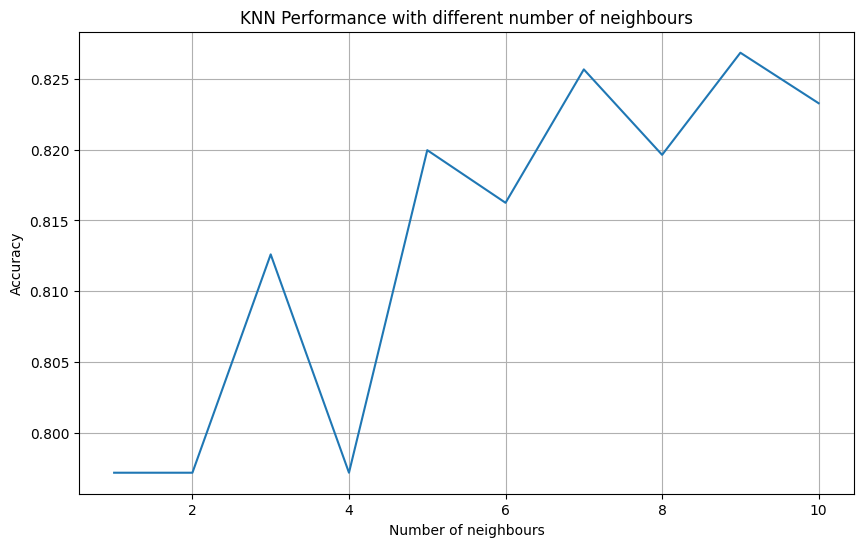

In [70]:
neighbours = param_grid['n_neighbors']

uniform_mean_scores = mean_scores[:10]

plt.figure(figsize=(10, 6))
plt.title("KNN Performance with different number of neighbours")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.plot(neighbours, uniform_mean_scores, label="Mean score")
plt.grid(True)
plt.show()

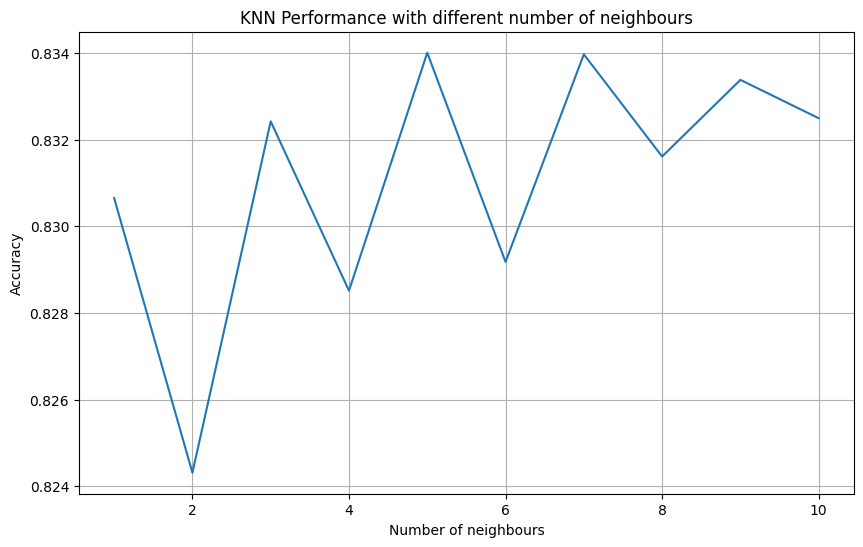

In [71]:
neighbours = param_grid['n_neighbors']

distance_mean_scores = mean_scores[10:]

plt.figure(figsize=(10, 6))
plt.title("KNN Performance with different number of neighbours")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.plot(neighbours, distance_mean_scores, label="Mean score")
plt.grid(True)
plt.show()

#### Task 5-2
Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.
 - Is there a difference between the average cross-validation score, the best cross-validation score and the test-score?



In [73]:
print("Average cross-validation score:", grid_search.cv_results_['mean_test_score'].mean())
print("Best cross-validation score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Test accuracy:", test_accuracy)

Average cross-validation score: 0.822313501565666
Best cross-validation score: 0.8340025787437835
Best parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Test accuracy: 0.8302949950281737


### Task 6
Repeat task 5 using stratified CV with k=5. Centre and scale the data before training the models. Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.

- Did the performances changes with the stratified CV?


In [77]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [5],
    'weights': ['uniform', 'distance']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

stratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=stratifiedKFold)

train_Y1 = train_Y1.ravel()
test_Y1 = test_Y1.ravel()

# Fit the GridSearchCV object to the training data
grid_search.fit(transformed_train_X1, train_Y1)

mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the training data using the best hyperparameters
best_model = KNeighborsClassifier(**best_params)
best_model.fit(transformed_train_X1, train_Y1)

# Measure the performance on the test data
print("Average cross-validation score:", grid_search.cv_results_['mean_test_score'])
print("Standard deviation cross-validation score:", grid_search.cv_results_['std_test_score'])
print("Best cross-validation score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
print("Test accuracy:", test_accuracy)

Average cross-validation score: [0.82851354 0.82435071]
Standard deviation cross-validation score: [0.00441763 0.00450223]
Best cross-validation score: 0.8285135384048627
Best parameters: {'n_neighbors': 5, 'weights': 'uniform'}
Test accuracy: 0.8223400729201193


### Task 7
Repeat task 5 using stratified group CV considering 'Race' as a group with k=5. Centre and scale the data before training the models. Print the average cross-validation score, the best cross-validation score, the best hyperparameter and the test-score.
 - Did the performances changes with the stratified group CV?

### Task 8
Now implement a nested CV for optimize the models’ hyper-parameters and assessing the models’ performance (with k=5 for the inner and outer loop). The inner loop should optimize the models’ hyper-parameters and the outer loop should assess the models’ performance.